<a href="https://colab.research.google.com/github/Feram1r/GIT_study/blob/main/%D0%A2%D1%83%D1%80%D0%BD%D0%B8%D1%80_%D0%98%D0%BD%D0%B6%D0%B5%D0%BD%D0%B5%D1%80%D1%8B_%D0%B1%D1%83%D0%B4%D1%83%D1%89%D0%B5%D0%B3%D0%BE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1 Задание

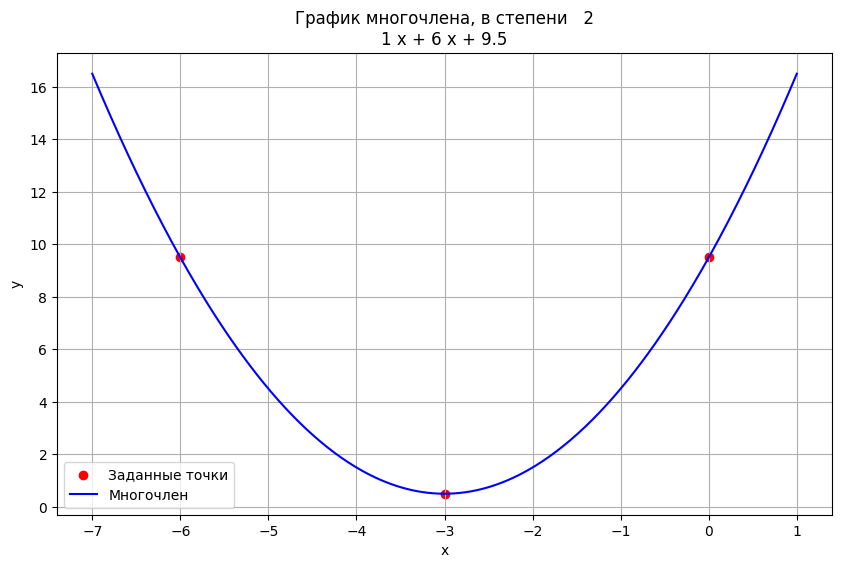

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures  # Класс преобразователь
# Задайте свои точки здесь
points = [(-6,9.5),(-3,0.5),(0,9.5)]  # Пример точек
x = [i[0] for i in points]
y = [i[1] for i in points]
degree=2
coefficients = np.polyfit(x, y, degree)


# Создаем функцию многочлена
polynomial = np.poly1d(coefficients)

x_range = np.linspace(min(x) - 1, max(x) + 1, 400)
y_range = polynomial(x_range)

plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='red', label='Заданные точки')  # Точки
plt.plot(x_range, y_range, label='Многочлен', color='blue')  # Многочлен
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title(f'График многочлена, в степени{polynomial}')
plt.grid(True)
plt.show()

# 2 Задание()

С МАТРИЦЕЙ

In [ ]:
def tsp_dynamic_programming(matrix):
    n = len(matrix)
    INF = float('inf')

    # dp[mask][i] = минимальная стоимость пути, проходящего через точки mask и заканчивающегося в i
    dp = [[INF] * n for _ in range(1 << n)]
    dp[1][0] = 0  # Начинаем с первой точки

    for mask in range(1 << n):
        for u in range(n):
            if not (mask & (1 << u)):  # Если точка u не включена в маску
                continue
            for v in range(n):
                if mask & (1 << v):  # Если точка v уже посещена
                    continue
                new_mask = mask | (1 << v)
                dp[new_mask][v] = min(dp[new_mask][v], dp[mask][u] + matrix[u][v])

    # Нахождение минимальной стоимости и восстановление пути
    full_set = (1 << n) - 1
    min_cost = INF
    last_point = -1
    for i in range(n):
        cost = dp[full_set][i] + matrix[i][0]  # Возвращаемся в начальную точку
        if cost < min_cost:
            min_cost = cost
            last_point = i

    # Восстановление пути
    route = []
    mask = full_set
    current = last_point
    while True:
        route.append(current)
        if mask == 1:  # Когда остаётся только начальная точка
            break
        for i in range(n):
            if mask & (1 << i) and dp[mask][current] == dp[mask ^ (1 << current)][i] + matrix[i][current]:
                mask ^= (1 << current)
                current = i
                break
    route.append(0)  # Возвращаемся в начальную точку
    route.reverse()

    return route, min_cost

# Пример использования
matrix = [[0,10,15,20,25],[10,0,35,25,30],[15,35,0,30,20],[20,25,30,0,10],[25,30,20,10,0]]
route, dist = tsp_dynamic_programming(matrix)
print("Лучший маршрут:", route)
print("Общая длина:", dist)

**СО СПИСКОМ ТОЧЕК**

In [1]:
import math
import sys

def tsp_dynamic_programming(points):
    n = len(points)
    INF = sys.maxsize

    # Создание матрицы расстояний
    dist = [[0] * n for _ in range(n)]
    for i in range(n):
        for j in range(n):
            if i != j:
                dist[i][j] = math.sqrt((points[i][0] - points[j][0])**2 + (points[i][1] - points[j][1])**2)

    # dp[mask][i] = минимальная стоимость пути, проходящего через точки mask и заканчивающегося в i
    dp = [[INF] * n for _ in range(1 << n)]
    dp[1][0] = 0  # Начинаем с первой точки

    for mask in range(1 << n):
        for u in range(n):
            if not (mask & (1 << u)):  # Если точка u не включена в маску
                continue
            for v in range(n):
                if mask & (1 << v):  # Если точка v уже посещена
                    continue
                new_mask = mask | (1 << v)
                dp[new_mask][v] = min(dp[new_mask][v], dp[mask][u] + dist[u][v])

    # Нахождение минимальной стоимости и восстановление пути
    full_set = (1 << n) - 1
    min_cost = INF
    last_point = -1
    for i in range(n):
        cost = dp[full_set][i] + dist[i][0]  # Возвращаемся в начальную точку
        if cost < min_cost:
            min_cost = cost
            last_point = i

    # Восстановление пути
    route = []
    mask = full_set
    current = last_point
    while True:
        route.append(current)
        if mask == 1:  # Когда остаётся только начальная точка
            break
        for i in range(n):
            if mask & (1 << i) and dp[mask][current] == dp[mask ^ (1 << current)][i] + dist[i][current]:
                mask ^= (1 << current)
                current = i
                break
    route.append(0)  # Возвращаемся в начальную точку
    route.reverse()

    return route, min_cost

# Пример использования
points = [(0, 0), (3, 4), (5, 7), (8, 1), (9, 5), (6, 2), (2, 8), (4, 6)]
route, dist = tsp_dynamic_programming(points)
print("Лучший маршрут:", route)
print("Общая длина:", dist)

Лучший маршрут: [0, 0, 5, 3, 4, 2, 6, 7, 1]
Общая длина: 30.38263764086815


In [ ]:
https://docs.google.com/document/d/1pwV-xBh7rqOm1Q3S_O-2c9k9iAlHO06mHzOmACX9NbI/edit?usp=sharing